<a href="https://colab.research.google.com/github/sseozy/2022-study/blob/opencv/MyGoodsGAN/colab/cup_image_manipulate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(256, 256, 3)


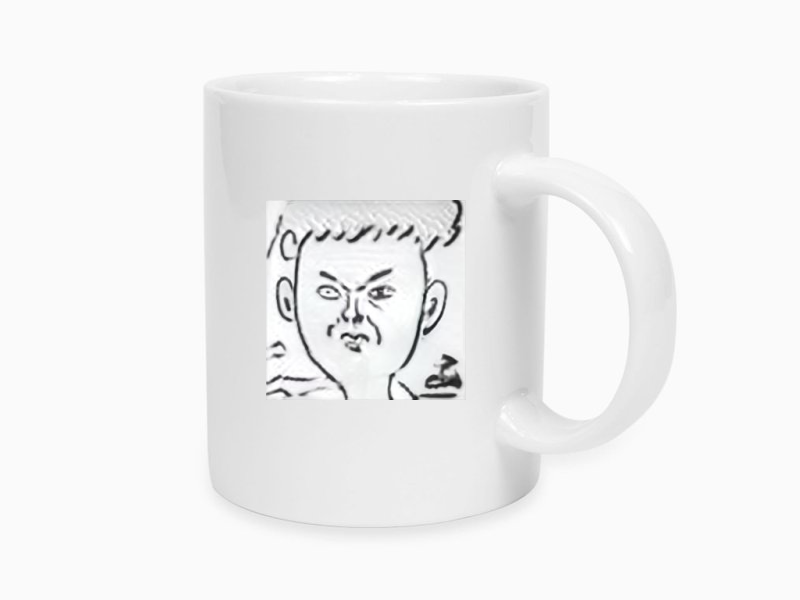

In [ ]:
# 볼록/오몬 렌즈 왜곡 효과 (remap_lens.py)

import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/이미지합성/이말년정섭.jpg')
print(img.shape)
rows, cols = img.shape[:2]

# ---① 설정 값 셋팅
exp = 1.5       # 볼록, 오목 지수 (오목 : 0.1 ~ 1, 볼록 : 1.1~)
scale = 1           # 변환 영역 크기 (0 ~ 1)

# 매핑 배열 생성 ---②
mapy, mapx = np.indices((rows, cols),dtype=np.float32)

# 좌상단 기준좌표에서 -1~1로 정규화된 중심점 기준 좌표로 변경 ---③
mapx = 2*mapx/(cols-1)-1
mapy = 2*mapy/(rows-1)-1

# 직교좌표를 극 좌표로 변환 ---④
r, theta = cv2.cartToPolar(mapx, mapy)

# 왜곡 영역만 중심확대/축소 지수 적용 ---⑤
r[r< scale] = r[r<scale] **exp  

# 극 좌표를 직교좌표로 변환 ---⑥
mapx, mapy = cv2.polarToCart(r, theta)

# 중심점 기준에서 좌상단 기준으로 변경 ---⑦
mapx = ((mapx + 1)*cols-1)/2
mapy = ((mapy + 1)*rows-1)/2
# 재매핑 변환
distorted = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)

from google.colab.patches import cv2_imshow

#cv2_imshow(img)
#cv2_imshow(distorted)
#cv2.waitKey()
#cv2.destroyAllWindows()


cv2.imwrite('/content/drive/MyDrive/이미지합성/이말년정섭왜곡.jpg',img)


#이미지 불러오기
background = cv2.imread("/content/drive/MyDrive/이미지합성/cup.jpeg")
logo = cv2.imread("/content/drive/MyDrive/이미지합성/이말년정섭왜곡.jpg")

#logo 사이즈 조절 
width = 200
 
aspect_ratio = float(width) / logo.shape[1]
dsize = (width, int(logo.shape[0] * aspect_ratio))
 
logo = cv2.resize(logo, dsize, interpolation=cv2.INTER_AREA)
#이미지 확인 
from google.colab.patches import cv2_imshow


gray_logo = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
_, mask_inv = cv2.threshold(gray_logo, 10, 255, cv2.THRESH_BINARY_INV)

#cv2_imshow(mask_inv)

background_height, background_width, _ = background.shape # 1024, 1024, 3
logo_height, logo_width, _ = logo.shape # 168, 306, 3

x = (background_height - logo_height) // 2 # /2의 몫만 가져옴 (정수만 가져오기 위해)
y = (background_width - logo_width + 200) // 3

roi = background[x: x+logo_height, y: y+logo_width]
#cv2_imshow(roi)

roi_logo = cv2.add(logo, roi, mask=mask_inv)
#cv2_imshow(roi_logo)

result = cv2.add(roi_logo, logo)
#cv2_imshow(result)

import numpy as np

np.copyto(roi, result)
cv2_imshow(background)

In [ ]:
 cv2.imwrite(/content/drive/MyDrive/이미지합성/이말년정섭왜곡.jpg',img)

True

In [ ]:
import cv2
import imutils
import matplotlib.pyplot as plt

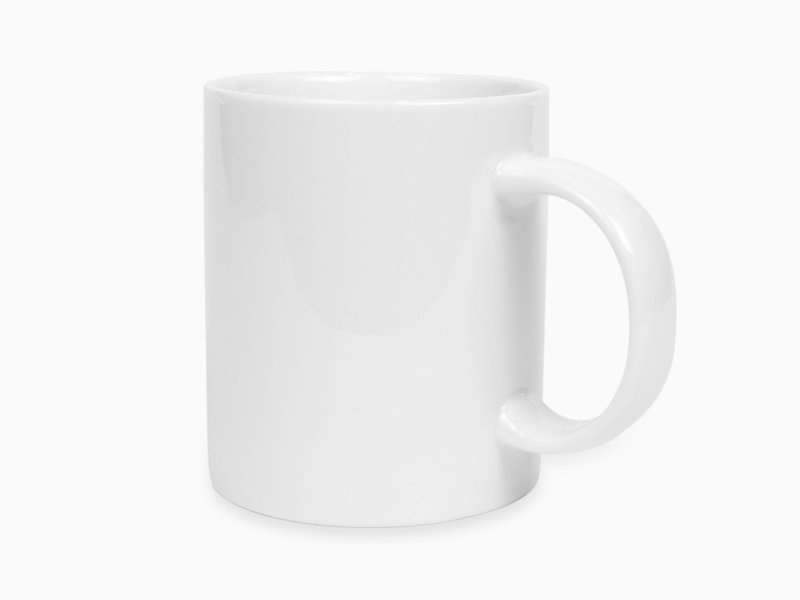

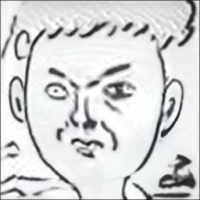

In [ ]:
#이미지 불러오기
background = cv2.imread("/content/drive/MyDrive/이미지합성/cup.jpeg")
logo = cv2.imread("/content/drive/MyDrive/이미지합성/이말년정섭왜곡.jpg")

#logo 사이즈 조절 
width = 200
 
aspect_ratio = float(width) / logo.shape[1]
dsize = (width, int(logo.shape[0] * aspect_ratio))
 
logo = cv2.resize(logo, dsize, interpolation=cv2.INTER_AREA)
#이미지 확인 
from google.colab.patches import cv2_imshow
cv2_imshow(background)
cv2_imshow(logo)


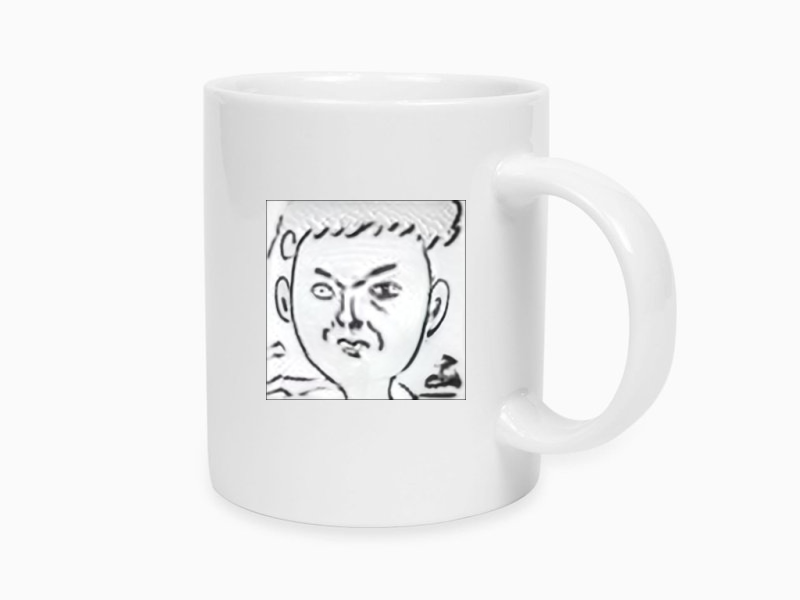

In [ ]:
gray_logo = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
_, mask_inv = cv2.threshold(gray_logo, 10, 255, cv2.THRESH_BINARY_INV)

#cv2_imshow(mask_inv)

background_height, background_width, _ = background.shape # 1024, 1024, 3
logo_height, logo_width, _ = logo.shape # 168, 306, 3

x = (background_height - logo_height) // 2 # /2의 몫만 가져옴 (정수만 가져오기 위해)
y = (background_width - logo_width + 200) // 3

roi = background[x: x+logo_height, y: y+logo_width]
#cv2_imshow(roi)

roi_logo = cv2.add(logo, roi, mask=mask_inv)
#cv2_imshow(roi_logo)

result = cv2.add(roi_logo, logo)
#cv2_imshow(result)

import numpy as np

np.copyto(roi, result)
cv2_imshow(background)
